In [2]:
import pandas as pd

In [4]:
costoumer =pd.read_csv("customer_master.csv")
#顧客データの読み取り

In [5]:
costoumer.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [7]:
item =pd.read_csv("item_master.csv")
#商品データの読み取り

In [8]:
transaction =pd.read_csv("transaction_1.csv")
#商品購入詳細

In [9]:
detail =pd.read_csv("transaction_detail_1.csv")
#個数や商品の管理

In [12]:
item.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [13]:
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [14]:
detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [11]:
transaction2 =pd.read_csv("transaction_2.csv")
detail2 =pd.read_csv("transaction_detail_2.csv")


In [14]:
transaction_mix =pd.concat([transaction,transaction2],ignore_index=True)
#concatでデータフレームに連結 igonre_indexで縦列につなげる

In [18]:
transaction_mix.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [19]:
print(len(transaction))
print(len(transaction2))
print(len(transaction_mix))

5000
1786
6786


In [12]:
detail_mix =pd.concat([detail,detail2],ignore_index=True)

In [28]:
print(len(detail),len(detail_mix),len(detail2))

5000 7144 2144


In [29]:
detail_mix.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [15]:
join_frame =pd.merge(detail_mix,transaction_mix[["transaction_id","payment_date","customer_id"]],on="transaction_id",how="left")

In [38]:
join_frame

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865
...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738


In [16]:
item

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [25]:
print(join_frame.columns,item.columns)

Index(['detail_id', 'transaction_id', 'item_id', 'quantity', 'payment_date',
       'customer_id', 'customer_name', 'registration_date',
       'customer_name_kana', 'email', 'gender', 'age', 'birth', 'pref'],
      dtype='object') Index(['item_id', 'item_name', 'item_price'], dtype='object')


In [22]:
join_frame =pd.merge(join_frame,costoumer,on="customer_id",how="left")

In [23]:
join_frame

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,宍戸 明,2019-01-04 13:24:40,ししど あきら,shishido_akira@example.com,M,64,1955/1/13,福井県
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,相原 みき,2019-02-11 19:34:02,あいはら みき,aihara_miki@example.com,F,74,1945/2/3,北海道
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,松田 早紀,2019-04-17 09:23:50,まつだ さき,matsuda_saki@example.com,F,40,1979/5/25,福島県
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,進藤 正敏,2019-02-20 18:15:56,しんどう まさとし,shinndou_masatoshi@example.com,M,56,1963/2/21,東京都


In [26]:
join_frame =pd.merge(join_frame,item,on="item_id",how="left")

In [27]:
join_frame.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [28]:
join_frame["price"] =join_frame["item_price"]*join_frame["quantity"]

In [30]:
join_frame[["item_price","quantity","price"]].head()

,item_price,quantity,price
0,210000,1,210000
1,50000,1,50000
2,120000,1,120000
3,210000,1,210000
4,85000,2,170000


In [31]:
#データの検算
print(join_frame["price"].sum())
print(transaction_mix["price"].sum())

971135000
971135000


In [32]:
join_frame["price"].sum() ==transaction_mix["price"].sum()

True

In [39]:
join_frame.isnull()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7140,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
len(join_frame)

7144

In [40]:
join_frame.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [42]:
join_frame["payment_date"]=pd.to_datetime(join_frame["payment_date"])

In [51]:
join_frame["payment_month"] =join_frame["payment_date"].dt.strftime("%Y%m")

In [52]:
join_frame[["payment_date","payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [53]:
join_frame.groupby("payment_month").sum()

,detail_id,quantity,age,item_price,price
payment_month,,,,,
201902,676866,1403,59279,142805000,160185000
201903,2071474,1427,58996,142980000,160370000
201904,3476816,1421,59246,143670000,160510000
201905,4812795,1390,58195,139655000,155420000
201906,6369999,1446,61070,147090000,164030000
201907,8106846,1485,62312,153215000,170620000


In [57]:
join_frame.groupby(["payment_month","item_name"]).sum()[["price","quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [58]:
pd.pivot_table(join_frame,index="item_name",columns="payment_month",values=["price","quantity"],aggfunc="sum")

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
table =pd.pivot_table(join_frame,index="payment_month",columns="item_name",values="price",aggfunc="sum")
        #テーブルの見やすさを作成引数として（既存となるデーた、index=まとめたい分類,columns=まとめられるカラム,values＝それぞれどのカラムでまとめるか

In [69]:
table.head()


item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


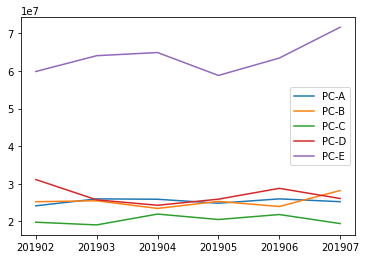

In [85]:
for i in table:
    plt.plot(table.index,table[i],label=i)
    plt.legend()
# plt.plot(list(table.index),table["PC-A"],label="PC-A")
# plt.plot(list(table.index),table["PC-A"],label="PC-A")
# plt.plot(list(table.index),table["PC-A"],label="PC-A")
# plt.plot(list(table.index),table["PC-A"],label="PC-A")

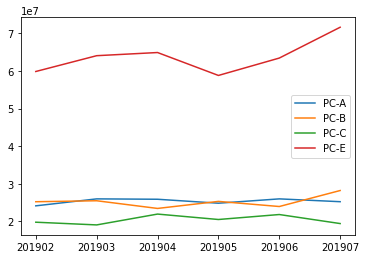

In [88]:
plt.plot(table.index,table["PC-A"],label="PC-A")
plt.plot(table.index,table["PC-B"],label="PC-B")
plt.plot(table.index,table["PC-C"],label="PC-C")
plt.plot(table.index,table["PC-E"],label="PC-E")
# plt.plot(list(table.index),table["PC-D"],label="PC-D")
plt.legend()


In [82]:
table["PC-E"]
# list(table.index)

payment_month
201902    59850000
201903    64050000
201904    64890000
201905    58800000
201906    63420000
201907    71610000
Name: PC-E, dtype: int64

In [83]:
table.index

Index(['201902', '201903', '201904', '201905', '201906', '201907'], dtype='object', name='payment_month')